In [1]:
from common import *

In [2]:
# Load dataset
def gen_data():
    for exp, µ in zip(['exp01', 'exp05', 'exp06'], ['baseline', 'low-delay', 'high-delay']):
        for classifier in ['DL (Drift)', 'Statistical']:
            respath = ROC_PATH / classifier.split()[0] / exp
            if µ == 'baseline' and classifier.startswith('DL'):
                respath = respath / 'drift'
            item = pd.read_csv(respath / f'subsampled_ROC_100.txt', sep=' ', names=['TPR', 'FPR'])
            item['Classifier'] = classifier
            item['µ value'] = µ
            yield item

data = pd.concat(gen_data()).reset_index(drop=True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `exp1v5v6-crop.pdf'.


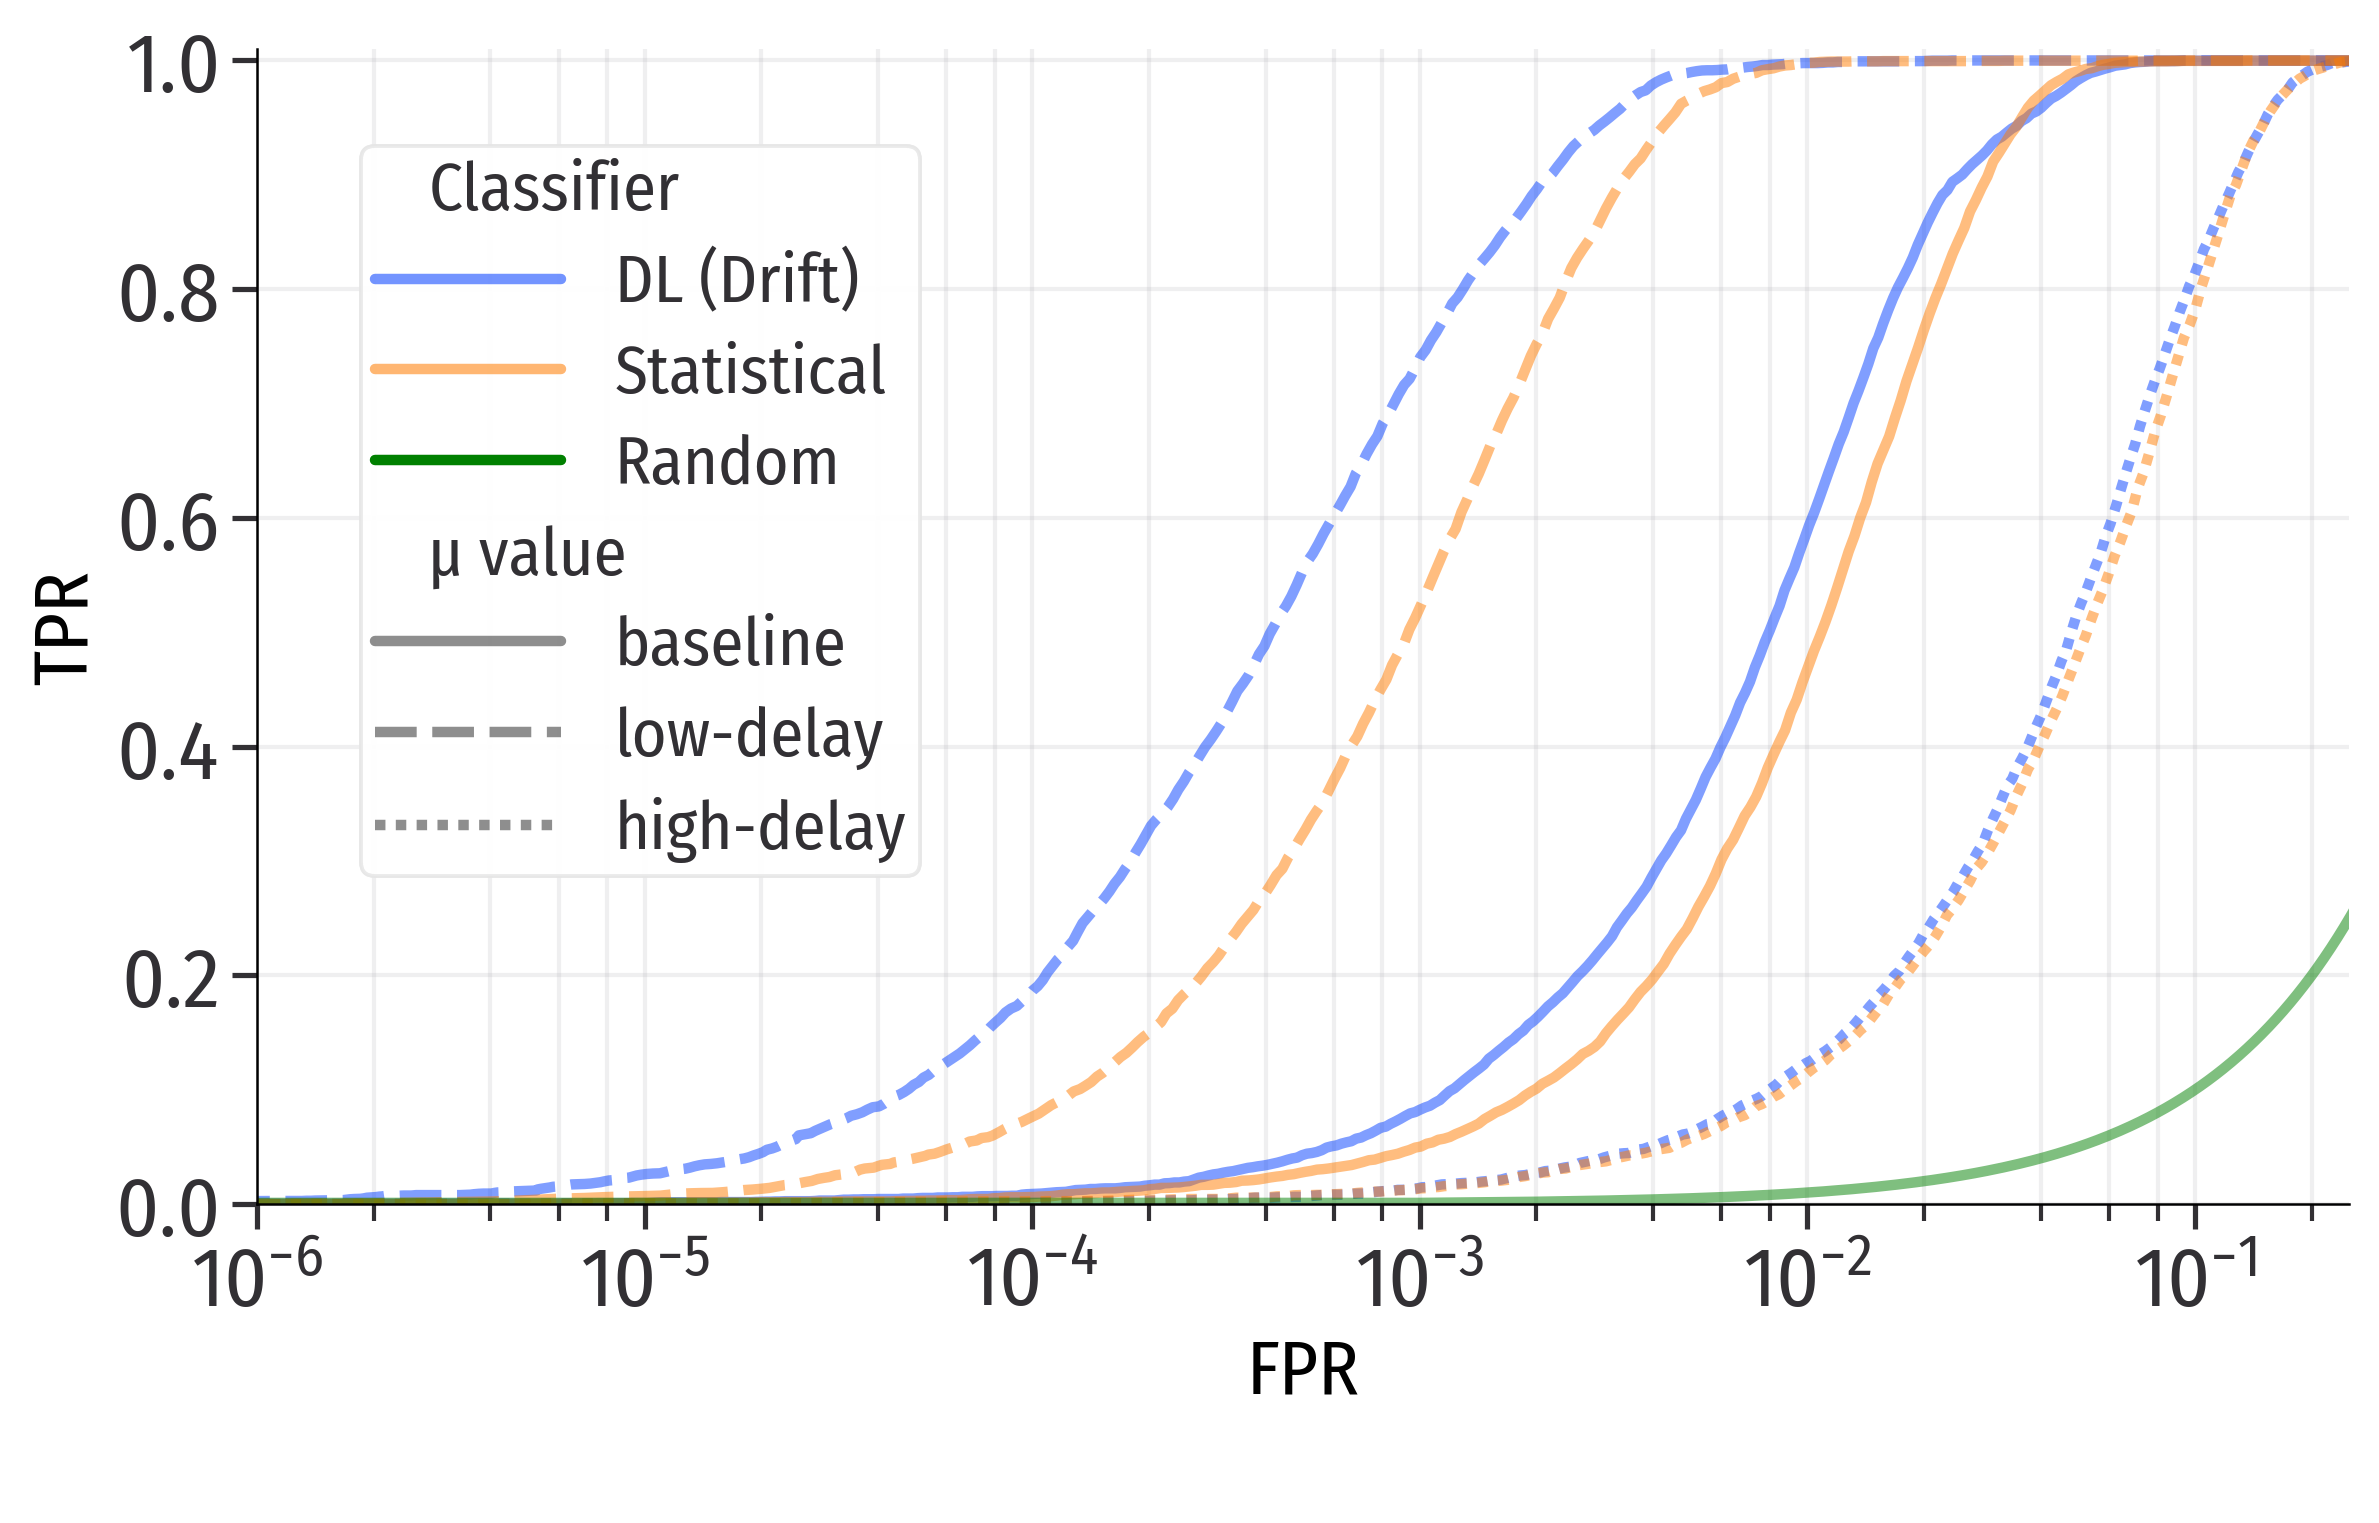

In [3]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

g = sns.lineplot(data=data, x='FPR', y='TPR', style='µ value', hue='Classifier', legend='full', ci=None, palette='bright')

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
handles.insert(3, Line2D([0],[0], color="green",))
labels.insert(3, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         loc='center left',
                         bbox_to_anchor=(0.05, 0.6),
                         ncol=1)
g.add_artist(windows_leg)

# shift legend titles to the left
for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[4].get_children()[0].set_width(0)

save_fig('exp1v5v6')